In [56]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
dataset = dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [60]:
dataset.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [61]:
#Data Imputation
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
# dataset['Age'] = dataset['Age'].apply(lambda x: dataset['Age'].mean() if pd.isnull(x) else x)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


C:\Users\norbe\AppData\Local\Temp\ipykernel_34872\353279788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)


# Preprocessing

In [62]:
dataset['Sex'] = dataset.Sex.apply(lambda x:1 if x == 'male' else 0)

In [63]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# Modelling
- Using sklearn library
- from scratch

In [64]:
import numpy as np

In [65]:
class logisticRegression:
    def __init__(self, n_var):
        self.params =  np.random.rand(n_var)
        
    def __sigmoid(self,lr_output):
        return 1/(1+np.exp(-lr_output))
    
    def __lr(self,X):
        return np.matmul(X, self.params)
    
    def predict(self, X):
        return self.__sigmoid(self.__lr(X))
    
    def __binaryCrossEntropy(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-7, 1-1e-7)
        term_0 = (1-y_true) * np.log(1-y_pred+1e-7)
        term_1 = y_true * np.log(y_pred+1e-7)
        return -np.mean(term_0 + term_1, axis=0)
    
    def __grad(self,X,loss):
        grad = np.dot(loss,X)
        return np.mean(grad, axis=0)
    
    def train(self, X, y, epochs=100, alpha=1e-10):
        for i in range(epochs):
            y_ = self.predict(X)
            loss = self.__binaryCrossEntropy(y_,y)
            gradient = self.__grad(X,loss)
            self.params -= alpha * gradient

            print(f'Epoch {i+1}/{epochs} loss: {loss}')
        

In [66]:
X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)
print(y_train)

592    0
672    0
847    0
36     1
455    1
      ..
102    0
432    1
774    1
318    1
821    1
Name: Survived, Length: 623, dtype: int64


In [67]:
lr = logisticRegression(X_train.shape[1])
print(X_train.shape[1])
lr.train(X_train,y_train, epochs=100, alpha=1e-5)

6
Epoch 1/100 loss: 9.507518683105305
Epoch 2/100 loss: 9.507518878127524
Epoch 3/100 loss: 9.507519079397115
Epoch 4/100 loss: 9.507519287125607
Epoch 5/100 loss: 9.507519501532302
Epoch 6/100 loss: 9.507519722844599
Epoch 7/100 loss: 9.50751995129832
Epoch 8/100 loss: 9.507520187138073
Epoch 9/100 loss: 9.507520430617602
Epoch 10/100 loss: 9.507520682000182
Epoch 11/100 loss: 9.507520941559013
Epoch 12/100 loss: 9.507521209577641
Epoch 13/100 loss: 9.507521486350408
Epoch 14/100 loss: 9.507521772182894
Epoch 15/100 loss: 9.507522067392422
Epoch 16/100 loss: 9.507522372308555
Epoch 17/100 loss: 9.507522687273628
Epoch 18/100 loss: 9.507523012643317
Epoch 19/100 loss: 9.507523348787213
Epoch 20/100 loss: 9.50752369608945
Epoch 21/100 loss: 9.507524054949346
Epoch 22/100 loss: 9.50752442578209
Epoch 23/100 loss: 9.507524809019454
Epoch 24/100 loss: 9.507525205110545
Epoch 25/100 loss: 9.507525614522594
Epoch 26/100 loss: 9.507526037741796
Epoch 27/100 loss: 9.507526475274181
Epoch 28/10

# Evaluation

- Accuracy
- Precision
- Recall
- F1
- ROC - AUC

In [68]:
prediction = lr.predict(X_train)
prediction = pd.DataFrame(prediction, columns=['pred'])
prediction = prediction.pred.apply(lambda x: 1 if x > 0.5 else 0)

In [69]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, prediction)
print('Accuracy:', accuracy)

Accuracy: 0.38362760834670945


In [70]:
#precision
from sklearn.metrics import precision_score

precision = precision_score(y_train, prediction)
print('Precision:', precision)

Precision: 0.38362760834670945


In [71]:
#recall
from sklearn.metrics import recall_score

recall = recall_score(y_train, prediction)
print('Recall:', recall)

Recall: 1.0


In [72]:
#f1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_train, prediction)
print('F1 Score:', f1)

F1 Score: 0.5545243619489559


In [73]:
#ROC-AUC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train, prediction)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.5


In [74]:
#classification report
from sklearn.metrics import classification_report

target_names = ['Not Survived', 'Survived']
print(classification_report(y_train, prediction, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.00      0.00      0.00       384
    Survived       0.38      1.00      0.55       239

    accuracy                           0.38       623
   macro avg       0.19      0.50      0.28       623
weighted avg       0.15      0.38      0.21       623



C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [75]:
# prediction_proba = classifier.predict_proba(X_test)
# print(prediction_proba)

In [76]:
# predict_log_proba = classifier.predict_log_proba(X_test)
# print(predict_log_proba)

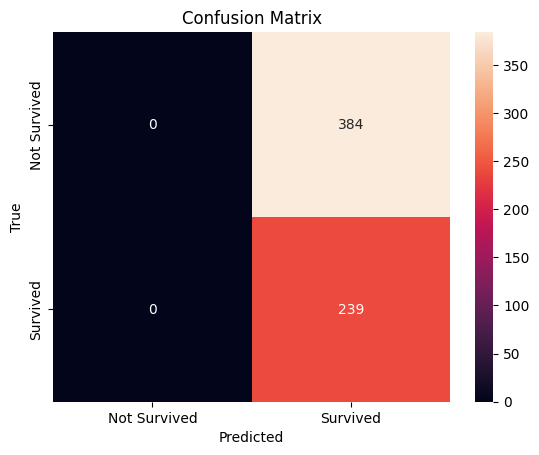

In [77]:
#confusion matrix plot

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, prediction)

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='True')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
ax.set_title('Confusion Matrix')
plt.show()



In [78]:
#training data classification report

target_names = ['Not Survived', 'Survived']

print(classification_report(y_train, prediction, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.00      0.00      0.00       384
    Survived       0.38      1.00      0.55       239

    accuracy                           0.38       623
   macro avg       0.19      0.50      0.28       623
weighted avg       0.15      0.38      0.21       623



C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [79]:
# balanced data classification report from db_upsampled
# balancing data in db to use in a logisticRegression model
from sklearn.utils import resample
db = pd.read_csv('titanic.csv')
db = db.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
db['Age'] = db['Age'].fillna(db['Age'].mean())
db['Sex'] = db.Sex.apply(lambda x:1 if x == 'male' else 0)
db_majority = db[db.Survived == 0]
db_minority = db[db.Survived == 1]
db_minority_upsampled = resample(db_minority, replace=True, n_samples=549, random_state=123)
db_upsampled = pd.concat([db_majority, db_minority_upsampled])
db_upsampled.Survived.value_counts()

X = db_upsampled.drop(columns=['Survived'])
y = db_upsampled['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)

lr = logisticRegression(X_train.shape[1])
print(X_train.shape[1])
lr.train(X_train,y_train, epochs=100, alpha=1e-5)

prediction = lr.predict(X_train)
prediction = pd.DataFrame(prediction, columns=['pred'])
prediction = prediction.pred.apply(lambda x: 1 if x > 0.5 else 0)

7
Epoch 1/100 loss: 7.7124742332328
Epoch 2/100 loss: 7.71247423178837
Epoch 3/100 loss: 7.712474229114695
Epoch 4/100 loss: 7.712474224139913
Epoch 5/100 loss: 7.712474214852993
Epoch 6/100 loss: 7.712474197494724
Epoch 7/100 loss: 7.712474165132033
Epoch 8/100 loss: 7.7124741055267485
Epoch 9/100 loss: 7.712474000488964
Epoch 10/100 loss: 7.712473849677022
Epoch 11/100 loss: 7.712473963999006
Epoch 12/100 loss: 7.712478685489924
Epoch 13/100 loss: 7.7125545685164925
Epoch 14/100 loss: 7.747928318108806
Epoch 15/100 loss: 7.335742595118664
Epoch 16/100 loss: 7.833876721248468
Epoch 17/100 loss: 7.963543497176951
Epoch 18/100 loss: 7.97756252943701
Epoch 19/100 loss: 7.855457570265645
Epoch 20/100 loss: 7.735112803994842
Epoch 21/100 loss: 7.5920599376944695
Epoch 22/100 loss: 7.53918765157809
Epoch 23/100 loss: 7.503160613959619
Epoch 24/100 loss: 7.515868518667976
Epoch 25/100 loss: 7.530728483959298
Epoch 26/100 loss: 7.531238472279893
Epoch 27/100 loss: 7.510439100077481
Epoch 28/1

C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encounte

In [80]:
target_names = ['Not Survived', 'Survived']

print(classification_report(y_train, prediction, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.50      0.99      0.67       384
    Survived       0.50      0.01      0.01       384

    accuracy                           0.50       768
   macro avg       0.50      0.50      0.34       768
weighted avg       0.50      0.50      0.34       768



In [81]:
dbE = pd.read_csv('titanic.csv')
dbE = dbE.drop(['Name', 'Ticket', 'Cabin'], axis=1)
dbE['Age'] = dbE['Age'].fillna(dbE['Age'].mean())
dbE['Embarked'] = dbE['Embarked'].fillna('S')
dbE['Sex'] = dbE.Sex.apply(lambda x:1 if x == 'male' else 0)
dbE['Embarked'] = dbE.Embarked.apply(lambda x:2 if x == 'S' else (1 if x == 'C' else 0))
dbE.Embarked.value_counts()


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = dbE.drop(columns=['Survived'])
y = dbE['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)

lr = logisticRegression(X_train.shape[1])
print(X_train.shape[1])
lr.train(X_train,y_train, epochs=100, alpha=1e-5)

prediction = lr.predict(X_train)
prediction = pd.DataFrame(prediction, columns=['pred'])
prediction = prediction.pred.apply(lambda x: 1 if x > 0.5 else 0)
dbE.Embarked.value_counts()

8
Epoch 1/100 loss: 9.507512375121758
Epoch 2/100 loss: 9.507512374463712
Epoch 3/100 loss: 9.507512373712416
Epoch 4/100 loss: 9.507512372853933
Epoch 5/100 loss: 9.507512371871883
Epoch 6/100 loss: 9.507512370746955
Epoch 7/100 loss: 9.507512369456641
Epoch 8/100 loss: 9.507512367976238
Epoch 9/100 loss: 9.507512366284505
Epoch 10/100 loss: 9.507512364384786
Epoch 11/100 loss: 9.50751236237458
Epoch 12/100 loss: 9.507512360662917
Epoch 13/100 loss: 9.507512360632187
Epoch 14/100 loss: 9.507512366627337
Epoch 15/100 loss: 9.507512391905044
Epoch 16/100 loss: 9.507512476457196
Epoch 17/100 loss: 9.507512740946805
Epoch 18/100 loss: 9.507513553779999
Epoch 19/100 loss: 9.507516085730055
Epoch 20/100 loss: 8.766965033951275
Epoch 21/100 loss: 6.209917188610875
Epoch 22/100 loss: 6.073215096418873
Epoch 23/100 loss: 6.032673101824509
Epoch 24/100 loss: 5.975624860993107
Epoch 25/100 loss: 5.87681115814213
Epoch 26/100 loss: 5.869122040860076
Epoch 27/100 loss: 5.9040319348530454
Epoch 28/

C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encounte

Embarked
2    646
1    168
0     77
Name: count, dtype: int64

In [82]:
target_names = ['Not Survived', 'Survived']

print(classification_report(y_train, prediction, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.62      0.99      0.76       384
    Survived       0.50      0.01      0.02       239

    accuracy                           0.62       623
   macro avg       0.56      0.50      0.39       623
weighted avg       0.57      0.62      0.48       623

